> *This is project for Udacity Data Analyst Nano degree Term 1 - Lesson 3 - Investigating a dataset*

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Basic Info**
> <br>
> In this project, we'll be analyzing movies' data from The Movie Database(TMDB). The dataset contains movies more than 10,000 movies' data from 1960s to 2015 including but not limited the following information:
<ul>
    <li>Ratings</li>
    <li>Budget & Revenue</li>
    <li>Cast & Director</li>
    <li>Runtime</li>
    <li>Production Company</li>
</ul>
The data can be download at <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv">here</a><br><br>

> **Environment** 
> <br>
> The project is running in this jupyter notebook with Python version 3.6.3 on Anaconda
with the following Python Packages:
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
</ul>

> **Questions**
> <br>
> The following are some questions that we are interested to find out in this dataset using Python:
- Which genres are most popular from year to year?
- Which production companies are most productive from year to year?
- Who is the most productive actor/actress from year to year?
- What is the relationship between release year and budget?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# import the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


From the results of `df.head()` function, I observed the following problems:
- "cast", "genres", "production_company" contains '|' instead of ',' to seperate the data
- unuseful columns: some of the columns are not useful such as "imdb_id", "homepage", "overview", ...etc.

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the results of `df.shape` and `df.info()` function, I observed the following problem:
- There are missing values in "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_company".

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the results of `df.describe()` function, I observed the following problems:
- There are null values in "budget", "revenue", "runtime", "budget_adj", "revenue_adj".
- The range of vote_count is very large, some of the average rating may be biased.

### Data Cleaning
In this section, I'm going to use pandas function to clean up the data including 3 parts:
1. Removing unnecessary columns
2. Remove columns with missing data
3. Removing duplicate columns

#### Part1- Removing unnecassary columns
Using `df.drop(['<column name>'])` functinon to Remove unnecessary columns including:
<br>
- imdb_id (not useful, use id instead)
- budget (not useful, use budget_adj instead)
- revenue (not useful, use budget_adj instead)
- original_title (not useful)
- homepage (not useful)
- tagline (not useful)
- keywords (not useful)
- overview (not useful)
- release_date (not useful, use release year instead)

In [6]:
# drop unnecessary columns
df.drop(['imdb_id','budget','revenue','original_title','homepage','tagline','keywords','overview', 'release_date'], axis=1, inplace=True)
df.head(3)

,id,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
# double check if the columns are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


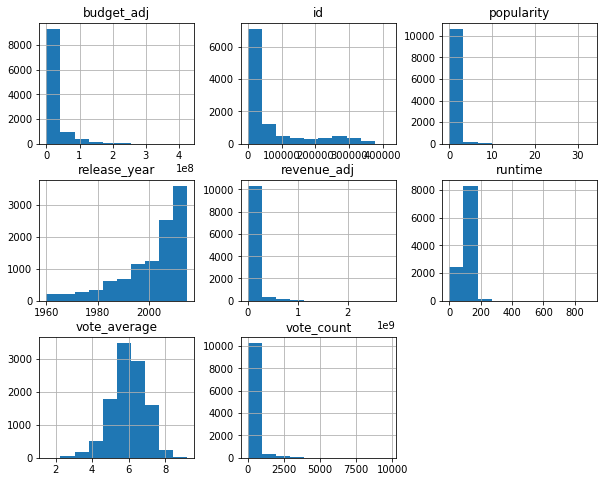

In [8]:
# check the dist. of data to know more about it
df.hist(figsize=(10,8));

#### Part2- Filling out empty columns


> From `df.info()` function we can see that: "cast", "director", "genres" has missing data
<br>
> Then  Using `.fillna()` function to fill missing data in "cast", "director", "genres" with space

In [9]:
# Check which columns has missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


In [10]:
# Fill null data with "N/A"
df['cast'].fillna("N/A", inplace=True)
df['director'].fillna("N/A", inplace=True)
df['genres'].fillna("N/A", inplace=True)
df['production_companies'].fillna("N/A", inplace=True)

In [11]:
# Double check if there's still null data
(df['cast'].isnull().sum(),df['director'].isnull().sum(),df['genres'].isnull().sum(),df['production_companies'].isnull().sum())

(0, 0, 0, 0)

#### Part3- Removing duplicate columns

> First check how many data are duplicated using `sum(df.duplicated())` function
<br>
> Then use `.drop_duplicates` to drop all the duplicated data.

In [12]:
# Check the amount of duplicates in the data
sum(df.duplicated())

1

In [13]:
# Delete duplicate data
df.drop_duplicates(inplace=True)

In [14]:
# Check if duplicate data is deleted
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I will answer the questions I'm interested in and using visualization to communicate the results. The following are the questions I'm interested:
- Which genres are most popular from year to year?
- Which production companies are most productive from year to year?
- Who is the most productive actor/actress from year to year?
- Which properties are associated with higher revenue?
- What is the relationship between release year and budget?

### Research Question 1: Which genres are most popular from year to year?

In [15]:
# Exporting data from the original columns, '|'
genres = []
genres_original = df['genres']
for item in genres_original:
    new = item.split('|')
    for n in new:
        genres.append(n)
# importing lists into DataFrame
# Reference: https://stackoverflow.com/questions/2084069/create-a-csv-file-with-values-from-a-python-list
df_genres = pd.DataFrame(data={"movie_genres": genres})
genres_value = df_genres['movie_genres'].value_counts()[:20]
genres_value

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: movie_genres, dtype: int64

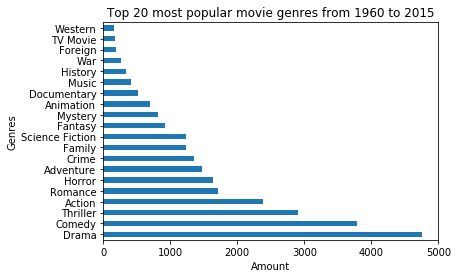

In [16]:
genres_value.plot(kind='barh')
plt.xlabel('Amount')
plt.ylabel('Genres')
plt.title('Top 20 most popular movie genres from 1960 to 2015');

> The data shows that the top 3 popular genres from year to year are: "Drama", "Comedy" and "Thriller".

### Research Question 2: Which production companies are most productive from year to year?

In [17]:
# Exporting data from the original columns, '|'
companies = []
companies_list = df['production_companies'].copy()
for item in companies_list:
    new = item.split('|')
    for n in new:
        companies.append(n)
# importing lists into DataFrame
# Reference: https://stackoverflow.com/questions/2084069/create-a-csv-file-with-values-from-a-python-list
df_companies = pd.DataFrame(data={"companies": companies})
company_count = df_companies['companies'].value_counts()
company_count.head()

N/A                                       1030
Universal Pictures                         522
Warner Bros.                               509
Paramount Pictures                         431
Twentieth Century Fox Film Corporation     282
Name: companies, dtype: int64

In [18]:
company_value = df_companies['companies'].value_counts()[1:20]
company_value

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
20th Century Fox                           88
Village Roadshow Pictures                  88
DreamWorks SKG                             88
BBC Films                                  87
Name: companies, dtype: int64

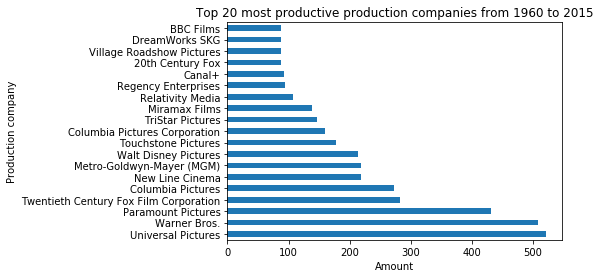

In [19]:
company_value.plot(kind='barh')
plt.xlabel('Amount')
plt.ylabel('Production company')
plt.title('Top 20 most productive production companies from 1960 to 2015');

> The data shows that the top 3 productive production companies from year to year are: "Universal Pictures", "Warner Bros." and "Paramount Pictures".

### Research Question 3: Who is the most productive actor/actress from year to year?

In [20]:
# Exporting data from the original columns, '|'
cast = []
cast_original = df['cast']
for item in cast_original:
    new = item.split('|')
    for n in new:
        cast.append(n)
# importing lists into DataFrame
# Reference: https://stackoverflow.com/questions/2084069/create-a-csv-file-with-values-from-a-python-list
df_cast = pd.DataFrame(data={"cast_info": cast})
cast_value = df_cast['cast_info'].value_counts()[1:21]
cast_value

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Susan Sarandon        48
Liam Neeson           48
Alec Baldwin          47
Julianne Moore        47
Gene Hackman          46
Johnny Depp           46
Tom Hanks             46
Christopher Walken    46
Willem Dafoe          45
Dennis Quaid          45
Sylvester Stallone    45
Name: cast_info, dtype: int64

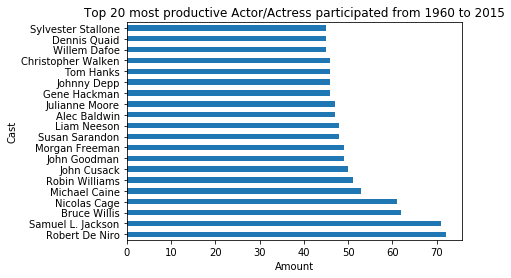

In [21]:
cast_value.plot(kind='barh')
plt.xlabel('Amount')
plt.ylabel('Cast')
plt.title('Top 20 most productive Actor/Actress participated from 1960 to 2015');

> The data shows that the top 3 most productive actor/actress from time to time are: "Robert De Niro", "Samuel L. Jackson" and "Bruce Willis".

### Research Question 4: What is the relationship between release year and budget?

> To answer this question, I would first group by the data with release year, calculating the mean budget of each year. Then, I will use matplotlib to show the trend and analyzing the results.

Here are my steps of finding out the result:<br>
- use `.corr()` function to know the relationship <br><br>

In [22]:
df.corr()['budget_adj']

id             -0.189008
popularity      0.513555
runtime         0.221127
vote_count      0.587062
vote_average    0.093079
release_year    0.016771
budget_adj      1.000000
revenue_adj     0.646627
Name: budget_adj, dtype: float64

> From the data we can see that only "popularity", "vote_count" and "revenue" is associated with higher movie budget

Visualizing the Results: <br>
- use the `groupby()` function to group by the data using 'release_year'
- calcualte the mean budget in each group
- plot the result using matplotlib and interpret the result


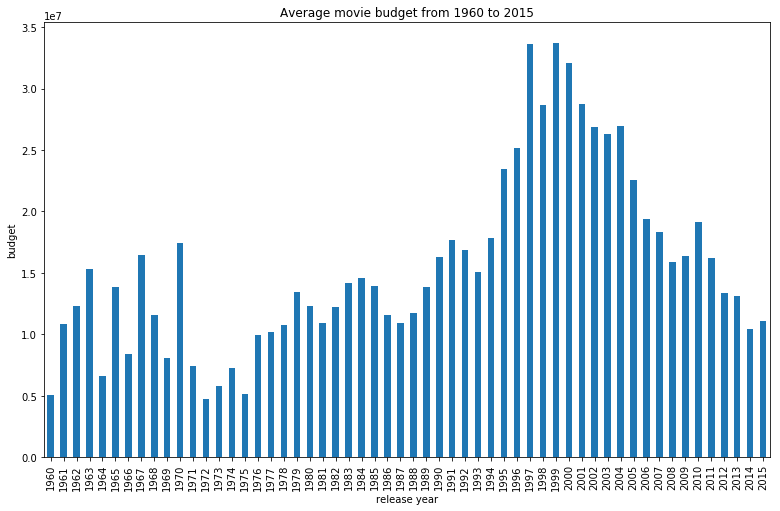

In [23]:
release_yr = df.groupby('release_year')['budget_adj'].mean()
release_yr.plot(kind='bar',figsize=(13,8))
plt.xlabel('release year')
plt.ylabel('budget')
plt.title('Average movie budget from 1960 to 2015');

> From the visualization, we can observe the following trend:
- The average movie budget growed with release year from 1971 to 1990s. 
- The average budget started to decline from 2000s. The reason of the budget decline may be the breakthrough in computer and media technology that can simulates many movies'scenes.

### Research Question 5: What kinds of properties are associated with movies that have high revenues?

> Check which numerical properties are associated with movies that have higher revenue:<br>
1- popularity <br>
2- runtime <br>
3- vote_count <br>
4- vote_average <br>
5- release_year <br>
6- budget 


In [24]:
df.corr()['revenue_adj']

id             -0.138487
popularity      0.609085
runtime         0.175668
vote_count      0.707941
vote_average    0.193062
release_year   -0.066236
budget_adj      0.646627
revenue_adj     1.000000
Name: revenue_adj, dtype: float64

> From the data we can imply that only "popularity", "vote_count", "budget" is associated with  higher "revenue".

#### 1- Visualizing the "popularity" and "revenue"

Here are my steps of visualizing the data:
- use the `describe()` function to better understand the data

In [25]:
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

- use the `round()` function to clean the 'popularity' data
- use the `groupby()` function to group by the data using 'popularity'
- calcualte the mean revenue valeu in each group
- plot the result using matplotlib

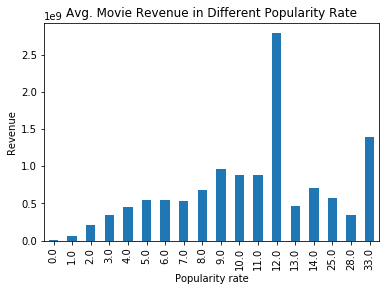

In [26]:
df['popularity_round'] = round(df['popularity'],0)
df.groupby('popularity_round')['revenue_adj'].mean().plot(kind='bar')
plt.xlabel('Popularity rate')
plt.ylabel('Revenue')
plt.title('Avg. Movie Revenue in Different Popularity Rate');

> The result of visualization is consistent with the results using `df.corr()` function. <br>
Higher "popularity" is associated with higher "revenue"

#### 2- Visualizing the "runtime" and "revenue"

Here are my steps of visualizing the data:
- use the `describe()` function to better understand the data

In [27]:
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [28]:
df['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In order to better plot the two variable, I adjust the order of magnitude from 'revenue_adj' and store the value in 'runtime_revenue'.

In [71]:
df['runtime_revenue'] = df['revenue_adj']/1000000

Next, I'm going to plot the results using `matplotlib`.

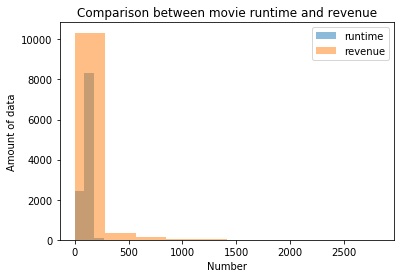

In [80]:
plt.hist(df['runtime'],bins=10,alpha=0.5,label='runtime')
plt.hist(df['runtime_revenue'],bins=10,alpha=0.5,label='revenue')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Amount of data')
plt.title('Comparison between movie runtime and revenue');

> The result of visualization is consistent with the results using `df.corr()` function. <br> 
Higher "runtime" is not associated with higher "revenue"

#### 3- Visualizing the "vote_count" and "revenue"

Here are my steps of finding out the result:
- use the `describe()` function to better understand the data

In [32]:
df['vote_count'].describe()

count    10865.000000
mean       217.399632
std        575.644627
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

In [33]:
df['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In order to better plot the two variable, I adjust the order of magnitude from 'revenue_adj' and store the value in 'vote_count_revenue'.

In [34]:
df['vote_count_revenue'] = df['revenue_adj']/100000

Next, I'm going to plot the results using `matplotlib`.

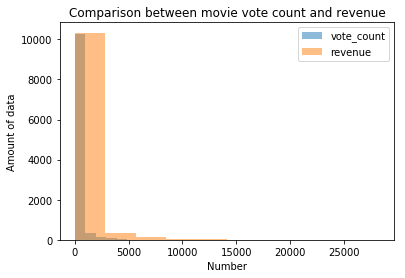

In [81]:
plt.hist(df['vote_count'],bins=10,alpha=0.5,label='vote_count')
plt.hist(df['vote_count_revenue'],bins=10,alpha=0.5,label='revenue')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Amount of data')
plt.title('Comparison between movie vote count and revenue');

> The result of visualization is consistent with the results using `df.corr()` function. <br> 
Higher "Vote Count" is associated with higher "revenue"

#### 4- Visualizing "vote_average" and "revenue"

Here are my steps of finding out the result:
- use the `describe()` function to better understand the data

In [36]:
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [37]:
df['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In order to better plot the two variable, I adjust the order of magnitude from 'revenue_adj' and store the value in 'vote_avg_revenue'.

In [91]:
df['vote_avg_revenue'] = df['revenue_adj']/100000000

Next, I'm going to plot the results using `matplotlib`.

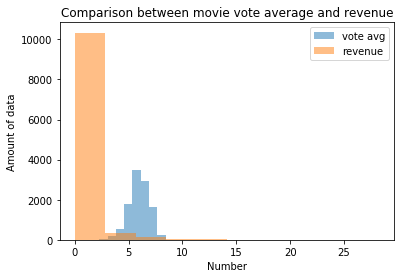

In [92]:
plt.hist(df['vote_average'],bins=10,alpha=0.5,label='vote avg')
plt.hist(df['vote_avg_revenue'],bins=10,alpha=0.5,label='revenue')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Amount of data')
plt.title('Comparison between movie vote average and revenue');

> The result of visualization is consistent with the results using `df.corr()` function. <br> 
Higher "vote_average" is not associated with higher "revenue".

#### 5- Visualizing "release year" and "revenue"

Here are my steps of finding out the result:
- use the `describe()` function to better understand the data

In [40]:
df['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

- use the `groupby()` function to group by the data using 'release year'
- calcualte the mean revenue in each group
- plot the result using matplotlib

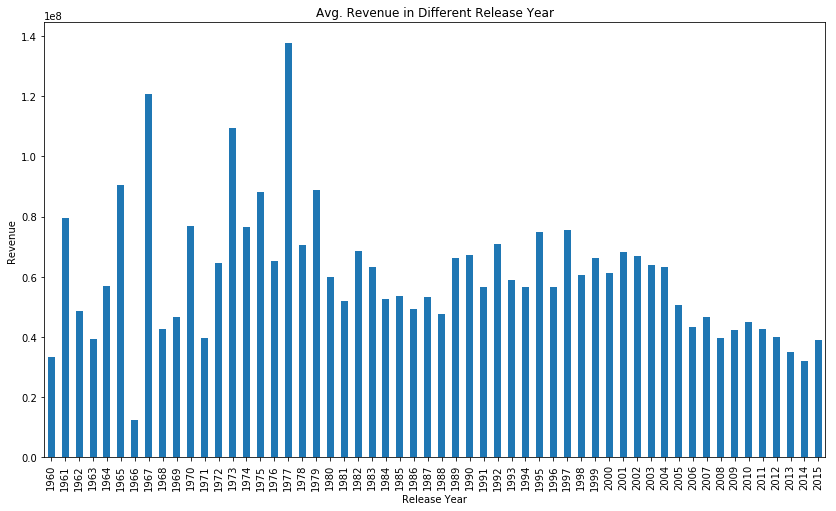

In [41]:
df.groupby('release_year')['revenue_adj'].mean().plot(kind='bar',figsize=(14,8))
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Avg. Revenue in Different Release Year');

> The result of visualization is consistent with the results using `df.corr()` function. <br>
"release year" is not associated with "revenue".

#### 6- Visualizing  "budget" and "revenue"

Here are my steps of finding out the result:
- use the `describe()` function to better understand the data

In [42]:
df['budget_adj'].describe()

count    1.086500e+04
mean     1.754989e+07
std      3.430753e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [43]:
df['revenue_adj'].describe()

count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

The order of magnitude between "revenue" and "budget" is about the same so I didn't adjust anything. <br>
Next, I'm going to plot the results using `matplotlib`.

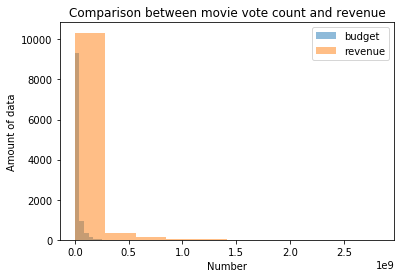

In [95]:
plt.hist(df['budget_adj'],bins=10,alpha=0.5,label='budget')
plt.hist(df['revenue_adj'],bins=10,alpha=0.5,label='revenue')
plt.legend()
plt.xlabel('Number')
plt.ylabel('Amount of data')
plt.title('Comparison between movie vote count and revenue');

> The result of visualization is consistent with the results using `df.corr()` function. <br>
Higher "budget" is associated with higher "revenue".

<a id='conclusions'></a>
## Conclusions

To sum up, we gain the following conclusion from the data:
- Top 3 popular genres from year to year are: "Drama", "Comedy" and "Thriller".
- Top 3 productive production companies from year to year are: "Universal Pictures", "Warner Bros." and "Paramount Pictures".
- Top 3 most productive actor/actress from time to time are: "Robert De Niro", "Samuel L. Jackson" and "Bruce Willis".
- "Release year" is not associated with "budget".
- Only "popularity", "vote_count", "budget" is associated with higher "revenue".

Although we have the above conclusion, there are still some limitations toward the analysis, for example:
- In the analysis, we dropped missing/Null values from variables of our interest. This might skew our analysis and could show unintentional bias towards relationship being analyzed.
- In this analysis, we worked with the TMBD Movies dataset, trying to understand the relationship between popularity, revenue, runtime, budget and revenue data. However, the analysis is limited to only provided dataset. For example, the dataset does not confirm that every release of every director is listed.
- In this analysis, the revenue adjustment is only considered in USD. There is no normalization or exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.